# Segmentation
## This notebook uses various Image Processing techniques in order to segment an object from an image.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("image.jpg")

In [4]:
resized = cv2.resize(image, (0,0), fx=0.25, fy=0.25)

In [5]:
cv2.imshow("Original Image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
resized.shape

(661, 1024, 3)

In [8]:
def get_details(image):
    width = image.shape[1]
    height = image.shape[0]
    channels = image.shape[2]
    return width, height, channels

In [9]:
width, height, channels = get_details(image)
print(f"Width = {width} \nHeight = {height} \nChannels = {channels}")

Width = 4096 
Height = 2645 
Channels = 3


In [5]:
# Convert the image to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale Image", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Trying all thresholding techniques

In [14]:
def plot_thresholding(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply basic thresholding techniques and store the results in a dictionary
    thresholds = {}
    thresholds['Binary'] = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]
    thresholds['Binary Inverted'] = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)[1]
    thresholds['Truncated'] = cv2.threshold(gray, 128, 255, cv2.THRESH_TRUNC)[1]
    thresholds['To Zero'] = cv2.threshold(gray, 128, 255, cv2.THRESH_TOZERO)[1]
    thresholds['To Zero Inverted'] = cv2.threshold(gray, 128, 255, cv2.THRESH_TOZERO_INV)[1]

    # Apply advanced thresholding techniques and store the results in a dictionary
    advanced_thresholds = {}
    advanced_thresholds['Adaptive Mean'] = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    advanced_thresholds['Adaptive Gaussian'] = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    advanced_thresholds['Otsu'] = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    advanced_thresholds['Triangle'] = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)[1]

    # Plot the original and thresholded images in a 2x5 grid
    fig, ax = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle('Thresholding Techniques', fontsize=14)

    ax[0, 0].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    ax[0, 0].set_title('Original Image')

    for i, (key, value) in enumerate(thresholds.items()):
        ax[0, i].imshow(value, cmap='gray')
        ax[0, i].set_title(key)

    for i, (key, value) in enumerate(advanced_thresholds.items()):
        ax[1, i].imshow(value, cmap='gray')
        ax[1, i].set_title(key)

    plt.show()


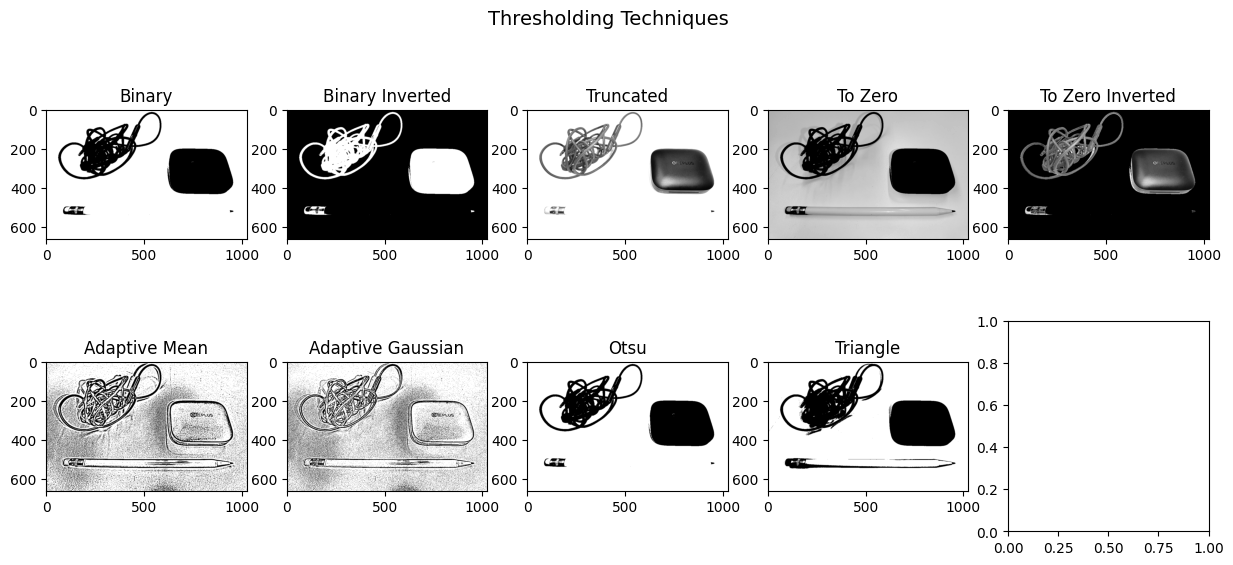

In [15]:
plot_thresholding(resized)

## Interactive Mode

### Basic Thresholding Techniques

#### Binary

In [14]:
# Define a function to be called when the trackbar value is changed
def on_change(val):
    # Get the current trackbar value
    threshold = cv2.getTrackbarPos('Threshold', 'Binary Image')

    # Apply thresholding with the specified value
    binary_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)[1]
    cv2.imshow('Binary Image', binary_img)

# Create a window to display the thresholded image
cv2.namedWindow('Binary Image')

# Create a trackbar to adjust the value
cv2.createTrackbar('Threshold', 'Binary Image', 128, 255, on_change)

# Call the on_change function once to display the initial image
on_change(128)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Truncated

In [15]:
# Define a function to be called when the trackbar value is changed
def on_change(val):
    # Get the current trackbar value
    threshold = cv2.getTrackbarPos('Threshold', 'Truncated Image')

    # Apply thresholding with the specified value
    truncated_img = cv2.threshold(gray, threshold, 255, cv2.THRESH_TRUNC)[1]
    cv2.imshow('Truncated Image', truncated_img)

# Create a window to display the image
cv2.namedWindow('Truncated Image')

# Create a trackbar to adjust the value
cv2.createTrackbar('Threshold', 'Truncated Image', 128, 255, on_change)

# Call the on_change function once to display the initial image
on_change(128)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Advanced Thresholding Techniques

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("image.jpg")
resized = cv2.resize(image, (0,0), fx=0.25, fy=0.25)
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

#### Adaptive Mean

In [ ]:
# Define a function to be called when the trackbar value is changed
def on_change(val):
    # Get the current trackbar values
    block_size = cv2.getTrackbarPos('Block Size', 'Adaptive Mean Image')
    c = cv2.getTrackbarPos('C', 'Adaptive Mean Image')

    # Ensure that block_size is an odd number
    if block_size % 2 == 0:
        block_size += 1

    # Apply thresholding with the specified value
    truncated_img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, c)
    cv2.imshow('Adaptive Mean Image', truncated_img)

# Create a window to display the image
cv2.namedWindow('Adaptive Mean Image')

# Create a trackbars to adjust the values
cv2.createTrackbar('Block Size', 'Adaptive Mean Image', 3, 500, on_change)
cv2.createTrackbar('C', 'Adaptive Mean Image', 0, 100, on_change)

# Call the on_change function once to display the initial image
on_change(0)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adaptive Gaussian

In [ ]:
# Define a function to be called when the trackbar value is changed
def on_change(val):
    # Get the current trackbar values
    block_size = cv2.getTrackbarPos('Block Size', 'Adaptive Mean Image')
    c = cv2.getTrackbarPos('C', 'Adaptive Mean Image')

    # Ensure that block_size is an odd number
    if block_size % 2 == 0:
        block_size += 1

    # Apply thresholding with the specified value
    truncated_img = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, c)
    cv2.imshow('Adaptive Mean Image', truncated_img)

# Create a window to display the image
cv2.namedWindow('Adaptive Mean Image')

# Create a trackbars to adjust the values
cv2.createTrackbar('Block Size', 'Adaptive Mean Image', 3, 500, on_change)
cv2.createTrackbar('C', 'Adaptive Mean Image', 0, 100, on_change)

# Call the on_change function once to display the initial image
on_change(0)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Histogram thresholding

In [21]:
# Define a function to be called when the trackbar value is changed
def on_change(val):

    # Split the image into its 3 channels
    b, g, r = cv2.split(resized)

    # Get the current trackbar values
    thresh_r = cv2.getTrackbarPos('thresh_r', 'Histogram Threshold Image')
    thresh_g = cv2.getTrackbarPos('thresh_g', 'Histogram Threshold Image')
    thresh_b = cv2.getTrackbarPos('thresh_b', 'Histogram Threshold Image')

    # Apply thresholding to each channel
    _, mask_r = cv2.threshold(r, thresh_r, 255, cv2.THRESH_BINARY)
    _, mask_g = cv2.threshold(g, thresh_g, 255, cv2.THRESH_BINARY)
    _, mask_b = cv2.threshold(b, thresh_b, 255, cv2.THRESH_BINARY)

    # Combine the masks
    mask = cv2.bitwise_or(cv2.bitwise_or(mask_r, mask_g), mask_b)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    result = cv2.bitwise_and(resized, resized, mask=mask_inv)

    # Display the result
    cv2.imshow('Histogram Threshold Image', result)

# Create a window to display the image
cv2.namedWindow('Histogram Threshold Image')

# Create a trackbars to adjust the values
cv2.createTrackbar('thresh_r', 'Histogram Threshold Image', 0, 255, on_change)
cv2.createTrackbar('thresh_g', 'Histogram Threshold Image', 0, 255, on_change)
cv2.createTrackbar('thresh_b', 'Histogram Threshold Image', 0, 255, on_change)

# Call the on_change function once to display the initial image
on_change(0)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Final Result

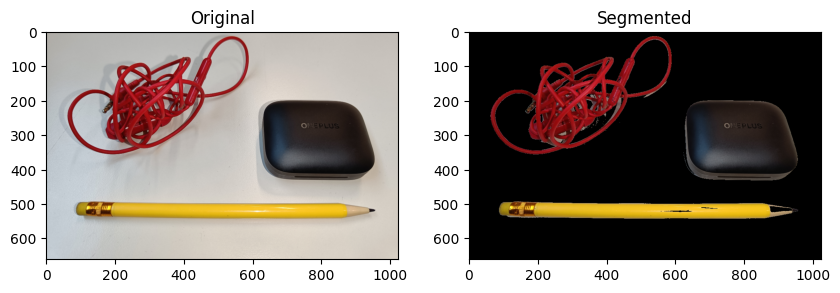

In [26]:
# Split the image into its 3 channels
b, g, r = cv2.split(resized)

# Apply thresholding to the channel
mask = cv2.threshold(b, 130, 255, cv2.THRESH_BINARY)[1]

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the original image
result = cv2.bitwise_and(resized, resized, mask=mask_inv)

# # Display the result
# cv2.imshow('Histogram Threshold Image', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Create a figure with two subplots
_, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image on the first subplot
axs[0].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Plot the thresholded image on the second subplot
axs[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
axs[1].set_title('Segmented')

# Show the figure
plt.show()